# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [191]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [195]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [198]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        predictions = X @ w
        errors = predictions - y
        
        return np.mean(errors ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        predictions = X @ w
        
        errors = predictions - y
        
        return (2 / len(X)) * (X.T @ errors)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [200]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [203]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    weight_history = []
    current_w = w_init.copy()  # Создаем копию начальных весов
    
    for _ in range(n_iterations):
        # Вычисляем градиент
        gradient = loss.calc_grad(X, y, current_w)
        
        # Обновляем веса: w_new = w_old - lr * gradient
        current_w = current_w - lr * gradient
        
        # Сохраняем текущие веса в историю
        weight_history.append(current_w.copy())
    
    return weight_history

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [205]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [206]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351958
0.8670644395649493


In [207]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

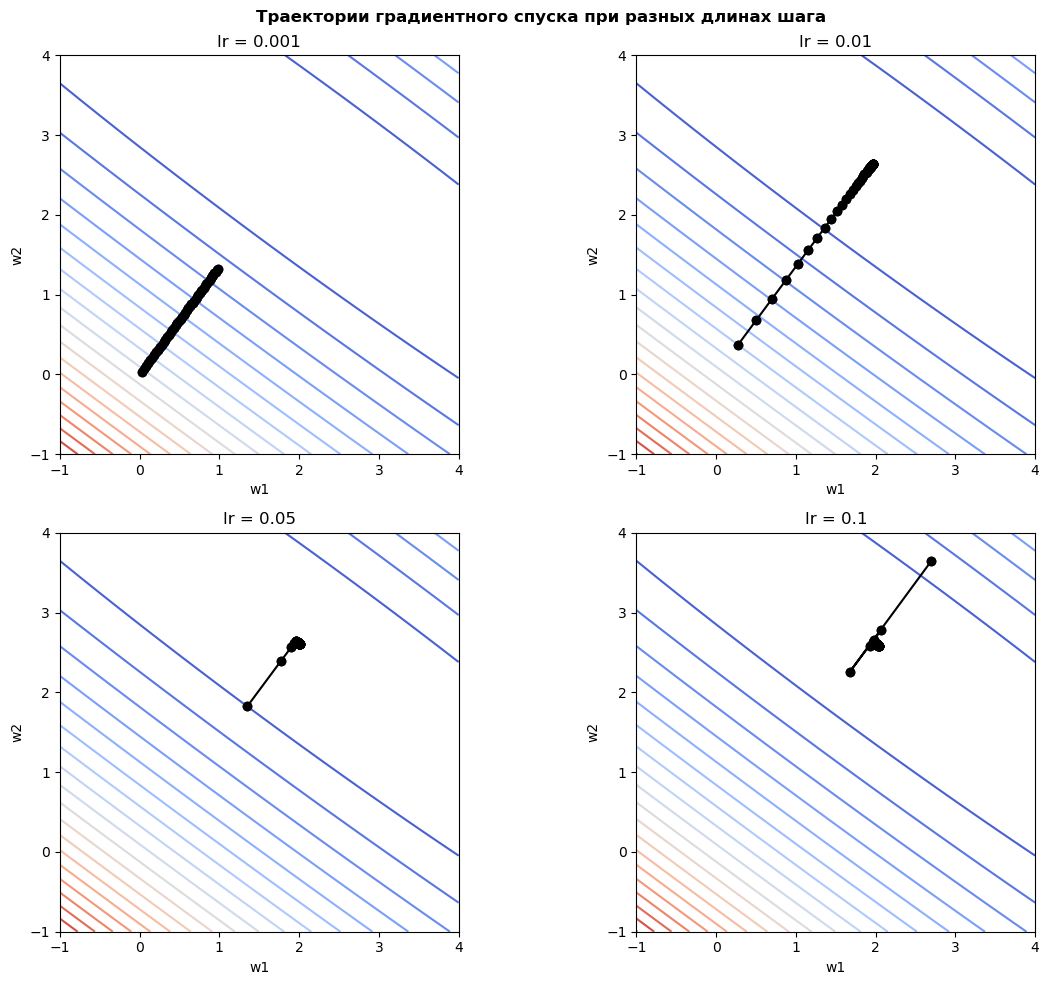

In [209]:
X = np.array([[1, 1],
              [1, 2],
              [2, 2],
              [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3  # y = X @ [1, 2] + 3 (шум не добавляем)

# Начальное приближение
w_init = np.array([0.0, 0.0])

# Объект лосса
loss = MSELoss()

# Разные значения lr
learning_rates = [0.001, 0.01, 0.05, 0.1]

# Визуализация всех траекторий на отдельных графиках
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, lr in enumerate(learning_rates):
    weight_history = gradient_descent(
        w_init=w_init,
        X=X,
        y=y,
        loss=loss,
        lr=lr,
        n_iterations=50
    )

    w_list = np.array(weight_history)
    meshgrid_space = np.linspace(-1, 4, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for ii in range(A.shape[0]):
        for jj in range(A.shape[1]):
            w_tmp = np.array([A[ii, jj], B[ii, jj]])
            levels[ii, jj] = loss.calc_loss(X, y, w_tmp)

    axes[i].contour(A, B, levels, levels=20, cmap='coolwarm')
    axes[i].plot(w_list[:, 0], w_list[:, 1], marker='o', color='black')
    axes[i].scatter(w_list[:, 0], w_list[:, 1], color='black')
    axes[i].set_title(f"lr = {lr}")
    axes[i].set_xlabel("w1")
    axes[i].set_ylabel("w2")
    axes[i].set_aspect("equal")

plt.suptitle("Траектории градиентного спуска при разных длинах шага", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

**Выводы:**

1. При минимальном шаге в 0.001 мы не достигаем минимума по причине того, что шаги слишком малы и нам нужно сильно больше итераций, чтобы дойти до необходимого минимума.
2. При lr=0.01 спуск показывает себя хорошо: он стабильно идет и достигает минимума. Здесь мы видим баланс между скоростью и стабильностью обучения.
3. При шаге в 0.05 точки начинают прыгать. После достижения минимума веса отскакивают назад. Это уже не оптимально.
4. При шаге в 0.1 мы видим явные скачки и нестабильность: минимум вообще не достигается, а точнее спуск перескакивает через минимум. 

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [213]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weight_history = []
    current_w = w_init.copy()

    n_objects = X.shape[0]

    for _ in range(n_iterations):
        
        #batch_indices = np.random.choice(n_objects, size=batch_size, replace=False)
        replace = batch_size > X.shape[0]
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=replace)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        gradient = loss.calc_grad(X_batch, y_batch, current_w)
        
        current_w = current_w - lr * gradient
    
        weight_history.append(current_w.copy())

    return weight_history

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

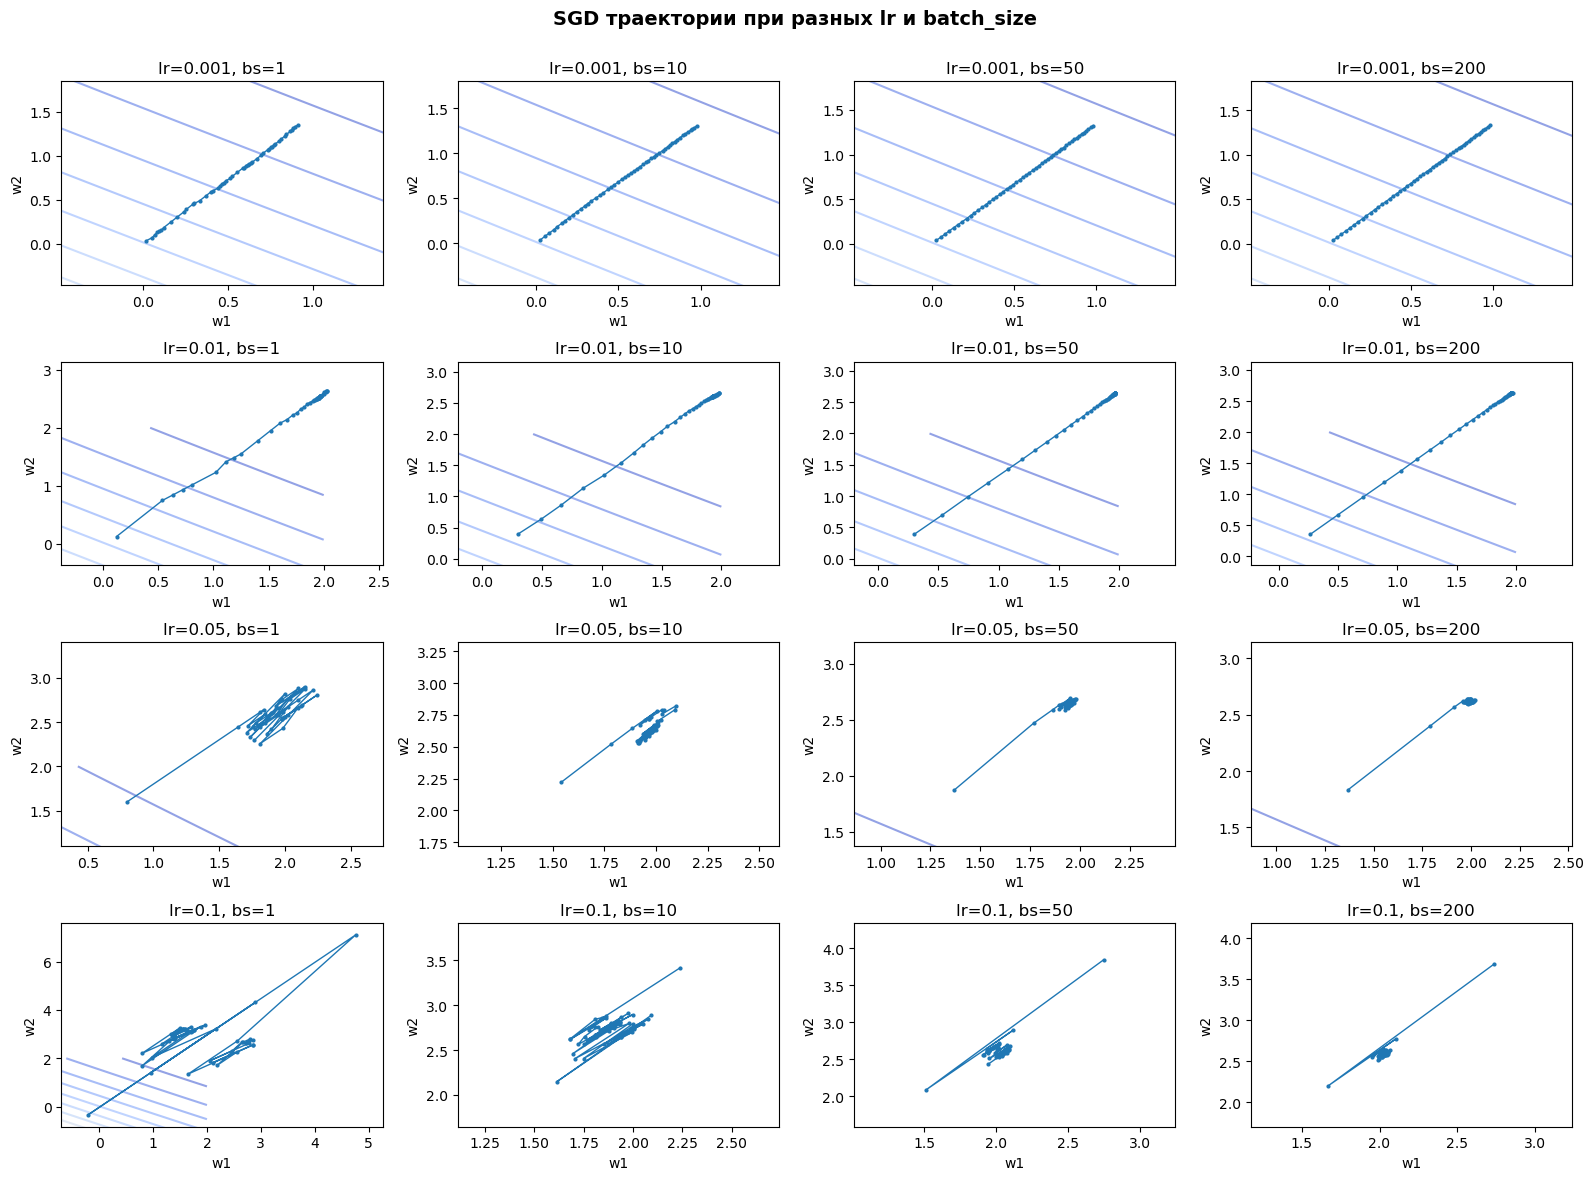

In [215]:
lrs = [0.001, 0.01, 0.05, 0.1]
batch_sizes = [1, 10, 50, 200]

fig, axes = plt.subplots(len(lrs), len(batch_sizes), figsize=(16, 12))
fig.suptitle("SGD траектории при разных lr и batch_size", fontsize=14, fontweight="bold")

for i, lr in enumerate(lrs):
    for j, batch_size in enumerate(batch_sizes):
        ax = axes[i, j]
        history = stochastic_gradient_descent(
            w_init=np.zeros(X.shape[1]),
            X=X,
            y=y,
            loss=loss,
            lr=lr,
            batch_size=batch_size,
            n_iterations=50  
        )

        w_list = np.array(history)
        meshgrid_space = np.linspace(-2, 2, 100)
        A, B = np.meshgrid(meshgrid_space, meshgrid_space)

        levels = np.empty_like(A)
        for m in range(A.shape[0]):
            for n in range(A.shape[1]):
                w_tmp = np.array([A[m, n], B[m, n]] + [0]*(X.shape[1]-2))  # 2D визуализация по первым двум координатам
                levels[m, n] = loss.calc_loss(X, y, w_tmp)

        ax.set_title(f"lr={lr}, bs={batch_size}")
        ax.set_xlabel("w1")
        ax.set_ylabel("w2")
        ax.set_xlim(w_list[:, 0].min() - 0.5, w_list[:, 0].max() + 0.5)
        ax.set_ylim(w_list[:, 1].min() - 0.5, w_list[:, 1].max() + 0.5)
        ax.contour(A, B, levels, levels=20, cmap=plt.cm.coolwarm, alpha=0.6)
        ax.plot(w_list[:, 0], w_list[:, 1], marker='o', markersize=2, linewidth=1)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Выводы:**
1. Чем больше размер батча, тем больше стохастический градиентный спуск похож на обычный градиентнй спуск.
2. Наиболее оптимальным из всех четырех вариантов считаю lr 0.05: траектория устойчивая, снижен шум. Чем больше батч, тем ярче это выражено.
3. При большой learning rate в 0.1 и при обучении только на 1 объекте спуск очень сильно колбасит. С увеличением батча станосится получше, но этот вариант однозначно не оптимален. 

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [219]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    n_objects = X.shape[0]
    w = w_init.copy()
    w_history = [w.copy()]
    
    s0 = batch_size  # параметр s0 фиксирован как размер подвыборки
    
    for t in range(n_iterations):
        # Затухающая длина шага
        eta_t = lr * (s0 / (s0 + t)) ** p
        
        # Сэмплируем подвыборку без замены
        batch_indices = np.random.choice(n_objects, size=batch_size, replace=True)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        # Градиент и шаг
        grad = loss.calc_grad(X_batch, y_batch, w)
        w -= eta_t * grad
        
        w_history.append(w.copy())
    
    return w_history

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

p = 0.1


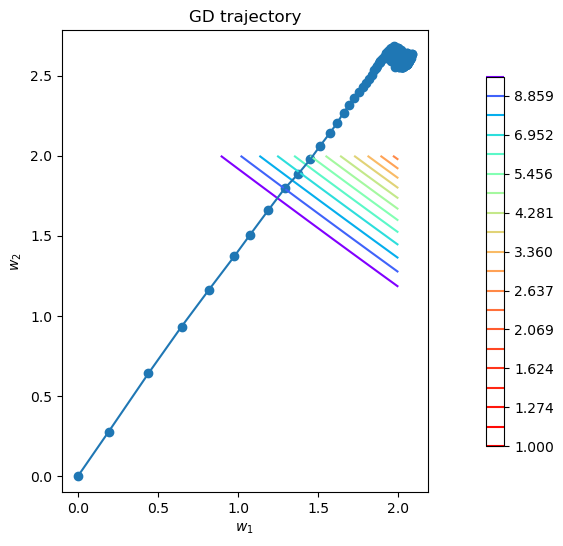

p = 0.3


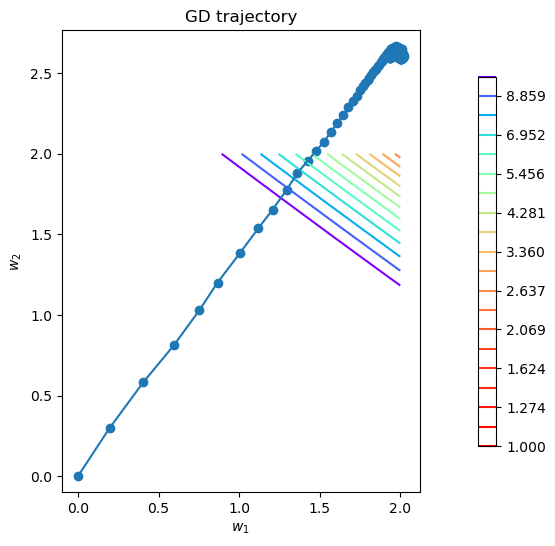

p = 0.6


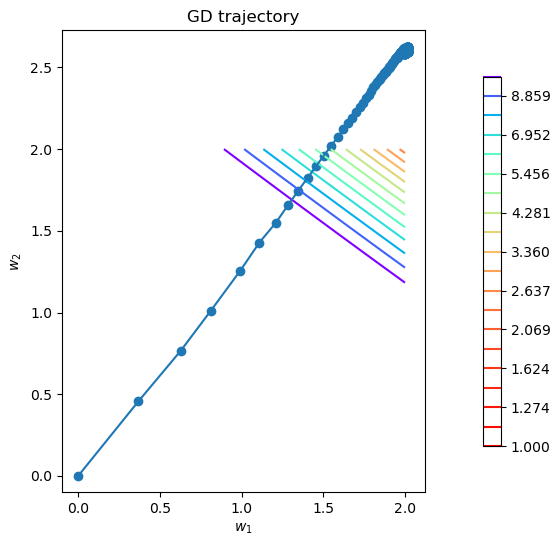

p = 1.0


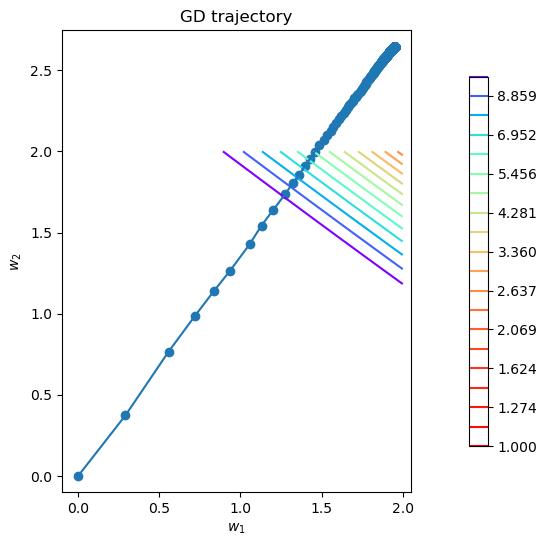

In [221]:
p_values = [0.1, 0.3, 0.6, 1.0]
lr=0.01
for p in p_values:
    print(f"p = {p}")
    history = stochastic_gradient_descent(
        w_init=np.zeros(X.shape[1]),
        X=X,
        y=y,
        loss=loss,
        lr=lr,
        batch_size=10,
        p=p,
        n_iterations=1000
    )
    plot_gd(history, X, y, loss)


**Выводы:**

*p управляет скоростью убывания шага обучения: если он 0, то шаг постоянный, а если 1, то шаг стремительно уменьшается. 
При p = 0.1 видны колебания возле минимма, потому что шаг уменьшается незначительно. При увеличении p этих проявлений меньше. При p=1 спуск успокаивается и приближается к минимуму постепенно.*

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

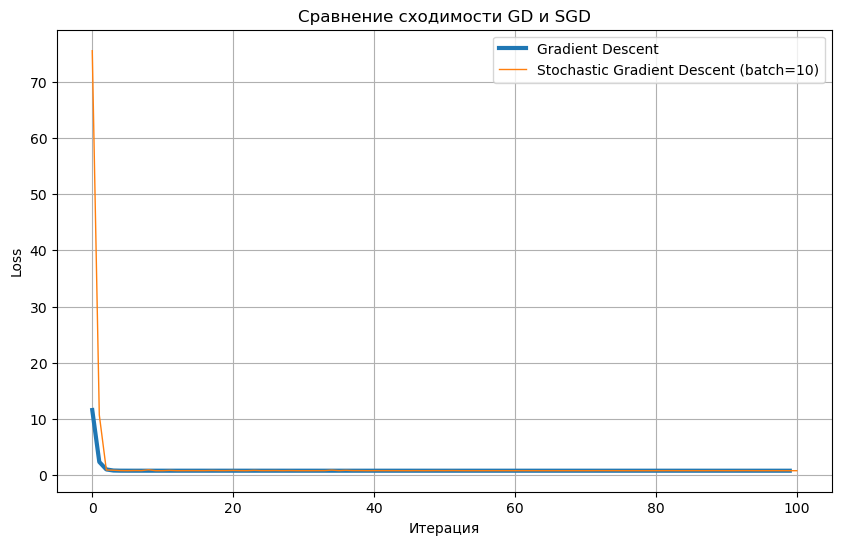

Final GD loss: 0.8182
Final SGD loss: 0.8216


In [224]:
lr = 0.1
n_iterations = 100
w_init = np.zeros(X.shape[1])
batch_size = 10
history_gd = gradient_descent(
    w_init=w_init,
    X=X,
    y=y,
    loss=loss,
    lr=lr,
    n_iterations=n_iterations
)

# Запускаем стохастический GD
history_sgd = stochastic_gradient_descent(
    w_init=w_init,
    X=X,
    y=y,
    loss=loss,
    lr=lr,
    batch_size=batch_size,
    p=1.0,
    n_iterations=n_iterations
)

losses_gd = [loss.calc_loss(X, y, w) for w in history_gd]
losses_sgd = [loss.calc_loss(X, y, w) for w in history_sgd]

#plot_gd(history_gd, X, y, loss)
plt.figure(figsize=(10, 6))
plt.plot(losses_gd, label="Gradient Descent", linewidth=3)
plt.plot(losses_sgd, label="Stochastic Gradient Descent (batch=10)", linewidth=1)
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.title("Сравнение сходимости GD и SGD")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final GD loss: {losses_gd[-1]:.4f}")
print(f"Final SGD loss: {losses_sgd[-1]:.4f}")

**Выводы:**

В данном случае мы не видим преимущества стохастического градиентного спуска над обычным градиентным спуском. GD сходится быстрее и достигает меньшего финального значения функции потерь. SGD колеблется и снижается менее стабильно. 

*Почему?*
В данном случае мы берем только лишь 10 наблюдений в одном батче и скорость обучения фиксированная => преимущества SGD просто не срабатывают. 


## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [229]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE -- ʕ•ᴥ•ʔ
        w_init = np.zeros(X.shape[1])

        trajectory = gradient_descent(
            w_init=w_init,
            X=X,
            y=y,
            loss=self.loss,
            lr=self.lr,
            n_iterations=1000  
        )

        self.w = trajectory[-1]

        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE -- ٩(⁎❛ᴗ❛⁎)۶
        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [231]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [233]:
import pandas as pd

data = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
data = data[~data[25].isna()].reset_index(drop=True)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [234]:
y = data[26]
X= data.drop(26, axis=1)
X

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,five,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22


**Описание данных:** This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Сolumns
1. symboling  (rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling")  2. normalized-losses  3. make  4. fuel-type  5. aspiration  6. num-of-doors  7. body-style  8. drive-wheels  9. engine-location  10. wheel-base  11. length  12. width  13. height  14. curb-weight  15. engine-type  16. num-of-cylinders  17. engine-size  18. fuel-system  19. bore  20. stroke  21. compression-ratio  22. horsepower  23. peak-rpm  24. city-mpg  25. highway-mpg  26. price

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [237]:
print(f'До преобразований в датафрейме {data.shape} наблюдений')
data.isna().sum()
#data[2].unique()

До преобразований в датафрейме (205, 26) наблюдений


1      0
2     41
3      0
4      0
5      0
6      2
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     4
20     4
21     0
22     2
23     2
24     0
25     0
26     4
dtype: int64

In [259]:
data_clean = data.dropna(subset=[26, 23, 22, 20, 19, 6]) #очистка данных от пропусков (там, где их 2-4)
new_columns = [
    'symboling',
    'normalized_losses',
    'make',
    'fuel_type',
    'aspiration',
    'num_of_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_type',
    'num_of_cylinders',
    'engine_size',
    'fuel_system',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg',
    'price']
data_clean.columns = new_columns
data_clean.isna().sum() #остались пропуски только в столбце нормированные убытки. 
#Принимаю решение его удалить, тк кажется, что эти данные не слишком важны

data_clean = data_clean.copy()
data_clean.drop(columns=['normalized_losses'], inplace=True)

 #- удаление

In [261]:
cars = data_clean.copy()
cars.dtypes
#object: make, fuel_type, aspiration, num_of_doors, body_style, drive_wheels, engine_location, engine_type, num_of_cylinders, fuel_system                
print(cars['make'].unique())   
print(cars['fuel_type'].unique()) #
print(cars['aspiration'].unique()) #
print(cars['num_of_doors'].unique()) #
print(cars['body_style'].unique()) #
print(cars['drive_wheels'].unique()) #
print(cars['engine_location'].unique()) #
print(cars['engine_type'].unique()) #
print(cars['num_of_cylinders'].unique()) #
print(cars['fuel_system'].unique()) #

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' 'idi' 'spdi']


##### Кодировка

In [263]:
from sklearn.preprocessing import OneHotEncoder
encoder_one_hot_binary = OneHotEncoder(sparse_output=False, drop='if_binary') #для бинарных

In [265]:
array1 = encoder_one_hot_binary.fit_transform(cars[['fuel_type']])
enc_cars = pd.DataFrame(array1, columns=encoder_one_hot_binary.get_feature_names_out(['fuel_type']))

cars= cars.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d1 = pd.concat([cars, enc_cars], axis=1)
display(d1['fuel_type_gas'].value_counts())

fuel_type_gas
1.0    174
0.0     19
Name: count, dtype: int64

In [267]:
array2 = encoder_one_hot_binary.fit_transform(cars[['aspiration']])
enc_cars = pd.DataFrame(array2, columns=encoder_one_hot_binary.get_feature_names_out(['aspiration']))

d1= d1.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d2 = pd.concat([d1, enc_cars], axis=1)
d2['aspiration_turbo'].value_counts()

aspiration_turbo
0.0    158
1.0     35
Name: count, dtype: int64

In [269]:
array3 =  encoder_one_hot_binary.fit_transform(cars[['num_of_doors']])
enc_cars = pd.DataFrame(array3, columns=encoder_one_hot_binary.get_feature_names_out(['num_of_doors']))

d2 = d2.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d3 = pd.concat([d2, enc_cars], axis=1)
d3['num_of_doors_two'].value_counts()

num_of_doors_two
0.0    112
1.0     81
Name: count, dtype: int64

In [271]:
array4 =  encoder_one_hot_binary.fit_transform(cars[['engine_location']])
enc_cars = pd.DataFrame(array4, columns=encoder_one_hot_binary.get_feature_names_out(['engine_location']))

d3 = d3.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d4 = pd.concat([d3, enc_cars], axis=1)
d4['engine_location_rear'].value_counts()

engine_location_rear
0.0    190
1.0      3
Name: count, dtype: int64

In [273]:
encoder_one_hot = OneHotEncoder(sparse_output=False, drop='first') #для небинарных

array5 =  encoder_one_hot.fit_transform(cars[['drive_wheels']])
enc_cars = pd.DataFrame(array5, columns=encoder_one_hot.get_feature_names_out(['drive_wheels']))

d4 = d4.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d5 = pd.concat([d4, enc_cars], axis=1)
d5.sample(3)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas,aspiration_turbo,num_of_doors_two,engine_location_rear,drive_wheels_fwd,drive_wheels_rwd
75,3,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,5000.0,19,24,14489.0,1.0,1.0,1.0,0.0,1.0,0.0
34,0,honda,gas,std,four,wagon,fwd,front,96.5,157.1,...,6000.0,30,34,7295.0,1.0,0.0,0.0,0.0,1.0,0.0
169,-1,toyota,gas,std,four,wagon,rwd,front,104.5,187.8,...,5200.0,19,24,15750.0,1.0,0.0,0.0,0.0,0.0,1.0


In [275]:
array6 =  encoder_one_hot.fit_transform(cars[['body_style']])
enc_cars = pd.DataFrame(array6, columns=encoder_one_hot.get_feature_names_out(['body_style']))

d5 = d5.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d6 = pd.concat([d5, enc_cars], axis=1)
d6.sample(3)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_type_gas,aspiration_turbo,num_of_doors_two,engine_location_rear,drive_wheels_fwd,drive_wheels_rwd,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon
77,1,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
137,0,subaru,gas,turbo,four,wagon,4wd,front,96.9,173.6,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72,3,mitsubishi,gas,std,two,hatchback,fwd,front,96.3,173.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [277]:
array7 =  encoder_one_hot.fit_transform(cars[['engine_type']])
enc_cars = pd.DataFrame(array7, columns=encoder_one_hot.get_feature_names_out(['engine_type']))

d6 = d6.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d7 = pd.concat([d6, enc_cars], axis=1)
d7.sample(3)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,drive_wheels_fwd,drive_wheels_rwd,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv
110,1,plymouth,gas,turbo,two,hatchback,fwd,front,93.7,157.3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
137,0,subaru,gas,turbo,four,wagon,4wd,front,96.9,173.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
166,3,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
array8 =  encoder_one_hot.fit_transform(cars[['num_of_cylinders']])
enc_cars = pd.DataFrame(array8, columns=encoder_one_hot.get_feature_names_out(['num_of_cylinders']))

d7 = d7.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d8 = pd.concat([d7, enc_cars], axis=1)
d8.sample(3)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,body_style_wagon,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve
84,1,nissan,gas,std,four,wagon,fwd,front,94.5,170.2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
93,0,nissan,gas,std,four,wagon,fwd,front,100.4,184.6,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
47,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [281]:
array9 =  encoder_one_hot.fit_transform(cars[['fuel_system']])
enc_cars = pd.DataFrame(array9, columns=encoder_one_hot.get_feature_names_out(['fuel_system']))

d8 = d8.reset_index(drop=True)
enc_cars = enc_cars.reset_index(drop=True)
d9 = pd.concat([d8, enc_cars], axis=1)
d9.sample(3)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
45,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
42,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [283]:
cars_en = pd.get_dummies(cars, columns=['make'], sparse=True)
cars_en = cars_en.reset_index(drop=True)
d9 = d9.reset_index(drop=True)
d10 = pd.concat([d9, cars_en], axis=1)

In [285]:
duplicated_columns = d10.columns[d10.T.duplicated()]
print("Дубликаты колонок:", duplicated_columns.tolist())
d_clean = d10.loc[:, ~d10.T.duplicated()]
d_clean.sample(2)

Дубликаты колонок: ['symboling', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
36,0,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,...,False,False,False,False,False,False,False,False,False,False
178,3,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,...,False,False,False,False,False,False,False,False,True,False


##### Разделение, Нормализация/стандартизация данных

In [287]:
pd.set_option('display.max_rows', None)
#print(d_clean.dtypes) #нужно преобразовать булевые переменные в числовые
d1 = d_clean.copy()

for col in d1.columns:
    if pd.api.types.is_sparse(d1[col]):
        d1[col] = d1[col].astype(int)

symboling                                int64
make                                    object
fuel_type                               object
aspiration                              object
num_of_doors                            object
body_style                              object
drive_wheels                            object
engine_location                         object
wheel_base                             float64
length                                 float64
width                                  float64
height                                 float64
curb_weight                              int64
engine_type                             object
num_of_cylinders                        object
engine_size                              int64
fuel_system                             object
bore                                   float64
stroke                                 float64
compression_ratio                      float64
horsepower                             float64
peak_rpm     

In [289]:
numerical_features = d1.select_dtypes(include=['int64', 'float64', 'int32']).columns
X = d1[numerical_features].drop('price', axis=1)
y = d1['price']

In [291]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape[0])
print("X_test:", X_test.shape)
print("y_test:", y_test.shape[0])

X_train: (135, 60)
y_train: 135
X_test: (58, 60)
y_test: 58


In [293]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

float_columns = X_train.select_dtypes(include=['float64']).columns

X_train_float = X_train[float_columns]
X_train_scaled = scaler.fit_transform(X_train_float) #скейл train

X_test_float = X_test[float_columns]
X_test_scaled = scaler.fit_transform(X_test_float) #скейл test

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [295]:
linear_regression.fit(X_train_scaled, y_train)
y_train_pred = linear_regression.predict(X_train_scaled)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [297]:
from sklearn.metrics import mean_squared_error

y_test_pred = linear_regression.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 3790832.5953
Test MSE: 13373312.2718


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [299]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE -- (´｡• ᵕ •｡`)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        n = X.shape[0]
        y_pred = X @ w
        errors = y_pred - y
        mse = np.mean(errors ** 2)
        w_reg = w[:-1]
        reg_term = self.coef * np.sum(w_reg ** 2)
        return mse + reg_term
        
        

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE -- (￢_￢)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        n = X.shape[0]
        y_pred = X @ w
        errors = y_pred - y
        grad_mse = (2 / n) * (X.T @ errors)
        w_reg = w.copy()
        w_reg[-1] = 0  # bias не регуляризуем
        grad_reg = 2 * self.coef * w_reg
        return grad_mse + grad_reg

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [301]:
linear_regression_L2 = LinearRegression(MSEL2Loss(0.1), lr=1e-4)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [303]:
linear_regression_L2.fit(X_train_scaled, y_train)

y_train_pred_L2 = linear_regression_L2.predict(X_train_scaled)
y_test_pred_L2 = linear_regression_L2.predict(X_test_scaled)

train_mse_L2 = mean_squared_error(y_train, y_train_pred_L2)
test_mse_L2 = mean_squared_error(y_test, y_test_pred_L2)

print(f"L2 train MSE при coef=0.1: {train_mse_L2:.4f}")
print(f"L2 test MSE при coef=0.1: {test_mse_L2:.4f}")
#Нужно подобрать что-то получше


L2 train MSE при coef=0.1: 140072932.9867
L2 test MSE при coef=0.1: 128516294.8348


In [305]:
for coef in [0.01, 0.1, 1.0, 10.0]:
    model = LinearRegression(MSEL2Loss(coef), lr=1e-4)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Коэффициент: {coef} | Test MSE: {mse:.4f}")

Коэффициент: 0.01 | Test MSE: 128312403.5492
Коэффициент: 0.1 | Test MSE: 128516294.8348
Коэффициент: 1.0 | Test MSE: 130565066.2054
Коэффициент: 10.0 | Test MSE: 147759946.6133


In [307]:
model_no_reg = LinearRegression(MSELoss(), lr=1e-4)
model_no_reg.fit(X_train_scaled, y_train)
y_pred_no_reg = model_no_reg.predict(X_test_scaled)
test_mse_no_reg = mean_squared_error(y_test, y_pred_no_reg)
print(f"Test MSE без регуляризации: {test_mse_no_reg:.4f}")

Test MSE без регуляризации: 128289771.1363


**Вывод:**
Наименьшее значение MSE на тестовой выборке наблюдается без регуляризации (128289771.1363), но разница минимальна по сравнению с coef = 0.01.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [309]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        residual = y - X @ w 
        abs_residual = np.abs(residual)
        
        loss = np.where(
            abs_residual <= self.eps,
            0.5 * residual**2,
            self.eps * (abs_residual - 0.5 * self.eps)
        )
        return np.mean(loss)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        residual = y - X @ w
        abs_residual = np.abs(residual)

        grad = np.where(
            abs_residual <= self.eps,
            -residual,
            -self.eps * np.sign(residual)
        )
        
        return (X.T @ grad) / len(y)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [311]:
huber_loss = HuberLoss(eps=1.0) 
model_huber = LinearRegression(loss=huber_loss, lr=1e-4)
model_huber.fit(X_train_scaled, y_train)
y_pred_huber = model_huber.predict(X_test_scaled)
test_mse_huber = mean_squared_error(y_test, y_pred_huber)

y_pred_huber_train = model_huber.predict(X_train_scaled)
train_mse_huber = mean_squared_error(y_train, y_pred_huber_train)

print(f"Test MSE при HuberLoss: {test_mse_huber:.4f}")
print(f"Train MSE при HuberLoss: {train_mse_huber:.4f}")

#Попытка подобрать лучший гиперпараметр
for eps in [0.1, 0.5, 1.0, 5.0, 100000000.0]:
    loss = HuberLoss(eps=eps)
    model = LinearRegression(loss=loss, lr=1e-4)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"eps: {eps} | Test Хубер Лосс: {mse:.4f}") #ни к чему особенному это не привело)

Test MSE при HuberLoss: 237503928.1893
Train MSE при HuberLoss: 243336184.6737
eps: 0.1 | Test Хубер Лосс: 237506169.0491
eps: 0.5 | Test Хубер Лосс: 237505173.1094
eps: 1.0 | Test Хубер Лосс: 237503928.1893
eps: 5.0 | Test Хубер Лосс: 237493969.0086
eps: 100000000.0 | Test Хубер Лосс: 166069529.0301


**Train MSE** | 3790832.5953
**Test MSE**  |13373312.2718

**Train Huber Loss** | 243336184.6737
**Test Huber Loss**  |237503928.1893

**Вывод:** В данном случае регрессия с MSELoss показывает лучшие результаты на обеих выборках. 
В Train/Test MSE с Хубером мы видим, что значения сравнимы, что может говорить о более стабильной обобщающей способности и отсусттвии переобучения. 

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

его еще не было:)

### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [313]:
import numpy as np

class SimulatedAnnealingRegressor:
    def __init__(self, loss_fn, n_iter=1000, initial_temp=1.0, cooling_rate=0.99):
        self.loss_fn = loss_fn  # MSELoss
        self.n_iter = n_iter
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate

    def fit(self, X, y):
        n_features = X.shape[1]
        self.w = np.random.randn(n_features)
        best_w = self.w.copy()
        best_loss = self.loss_fn.calc_loss(X, y, self.w)

        temp = self.initial_temp
        losses = [best_loss]

        for i in range(self.n_iter):
            new_w = self.w + np.random.standard_t(df=3, size=self.w.shape)

            new_loss = self.loss_fn.calc_loss(X, y, new_w)
            delta = new_loss - best_loss
            if delta < 0 or np.random.rand() < np.exp(-delta / temp):
                self.w = new_w
                if new_loss < best_loss:
                    best_loss = new_loss
                    best_w = new_w

            temp *= self.cooling_rate
            losses.append(best_loss)

        self.w = best_w
        self.losses = losses

    def predict(self, X):
        return X @ self.w


In [315]:

mse_loss = MSELoss()
model_sa = SimulatedAnnealingRegressor(loss_fn=mse_loss, n_iter=2000, initial_temp=10.0, cooling_rate=0.995)
model_sa.fit(X_train_scaled, y_train)

y_pred_sa = model_sa.predict(X_test_scaled)
mse_sa = mean_squared_error(y_test, y_pred_sa)

print(f"Test MSE с имитацией отжига: {mse_sa:.4f}")

Test MSE с имитацией отжига: 195647691.8563


In [320]:
print(f"Разница в MSE:\n"
      f"- Градиентный спуск: {test_mse:.4f}\n"
      f"- Имитация отжига: {mse_sa:.4f}\n")

Разница в MSE:
- Градиентный спуск: 13373312.2718
- Имитация отжига: 195647691.8563



Градиентный спуск показал лучший результат по MSE. Это подтверждает, что для задачи линейной регрессии с выпуклой функцией потерь (MSE) градиентный спуск подходит лучше. Однако, имитация отжига может быть полезной при более сложных функциях потерь с несколькими минимумами.